1

In [1]:
! pip install transformers

In [2]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel 
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

Load dataset

In [ ]:
fake_data=pd.read_csv("../input/fake-news-detection-dataset-english/Fake.csv/Fake.csv")
real_data=pd.read_csv("../input/fake-news-detection-dataset-english/True.csv/True.csv")

2

In [32]:
final_data=pd.read_csv("/kaggle/input/fake-news-classification/WELFake_Dataset.csv")
final_data

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


Data Analysis

In [ ]:
fake_data.head()

In [ ]:
real_data.head()

In [ ]:
real_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5
    

In [ ]:
fake_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

wordcloud real text data

In [ ]:
wordcld_mask=np.array(Image.open("../input/wodcloud-twiter-pic/twitter.png"))

In [ ]:
wordcld_text=" ".join(real_data["text"].tolist())

In [ ]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(wordcld_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

wordcloud fake text data

In [ ]:
fake_text=" ".join(fake_data["text"].tolist())

In [ ]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(fake_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
fake_data["label"]="fake"
real_data["label"]="real"

In [ ]:
final_data= pd.concat([fake_data,real_data])

In [ ]:
final_data = final_data.sample(frac=1).reset_index(drop=True)

In [ ]:
final_data.head(10)

In [ ]:
final_data.isnull().sum()

3

In [33]:
final_data.dropna(inplace=True)


In [34]:
final_data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [ ]:
final_data.label.value_counts()

In [7]:
final_data=final_data.sample(n=10000, random_state=42)

In [35]:
final_data

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=final_data["label"])

In [ ]:
final_data.head(5)

In [36]:
final_data["text"]=final_data["title"]+final_data["text"]

In [37]:
final_data=final_data[["text","label"]]

In [ ]:
final_data['label'] = final_data['label'].map({'real':1, 'fake':0})

In [38]:
final_data.sample(5)

,text,label
37334,Trump Goes DISGUSTINGLY Low With Assault On H...,1
36738,Donald Trump Learned A New Word And It Should...,1
40574,WARNING: USDA ALLOWING OVER 20 SYNTHETIC SUBST...,1
14101,Twitter ROASTS Trump For Pathetic Christmas M...,1
46778,How Safe is Food Packaging to our Health?Keywo...,1


In [ ]:
final_data

In [ ]:
final_data.label[9943]

In [ ]:
final_data.text[36709]

4

In [39]:
max_len=100
data_text=final_data["text"]
data_label=final_data["label"]


In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Model

In [51]:
from transformers import RobertaModel, TFRobertaModel,RobertaTokenizer
bert_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
bert_model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = AutoTokenizer.from_pretrained('roberta-base')

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [15]:
def tokenize(X):
    
    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [42]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)

In [ ]:
2.31

In [ ]:
11.50

In [ ]:
1.03

In [43]:
maxlen=100

create bert model

In [53]:
def create_model():
    dropout_rate=0.2
    input_ids=Input(shape=(maxlen,),dtype=tf.int32)
    input_mask=Input(shape=(maxlen,),dtype=tf.int32)
    bert_layer=bert_model([input_ids,input_mask])[1]
    x=Dropout(0.5)(bert_layer)
    x=Dense(128,activation="tanh")(x)
    x=Dropout(0.2)(x)
    x=Dense(64,activation="tanh")(x)
    x=Dropout(0.1)(x)
    x=Dense(1,activation="sigmoid")(x)
    model = Model(inputs=[input_ids, input_mask], outputs=x)
    return model


In [41]:
def create_model():
    dropout_rate=0.2
    input_ids=Input(shape=(maxlen,),dtype=tf.int32)
    input_mask=Input(shape=(maxlen,),dtype=tf.int32)
    bert_layer=bert_model([input_ids,input_mask])[1]
    x=Dropout(0.5)(bert_layer)
    x=Dense(64,activation="tanh")(x)
    x=Dropout(0.2)(x)
    x=Dense(1,activation="sigmoid")(x)
    model = Model(inputs=[input_ids, input_mask], outputs=x)
    return model
    
    

In [54]:
model=create_model()
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model_2 (TFRobertaMo TFBaseModelOutputWit 124645632   input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
dropout_120 (Dropout)           (None, 768)          0           tf_roberta_model_2[0][1]   

In [42]:
pip install pydot graphviz

Note: you may need to restart the kernel to use updated packages.


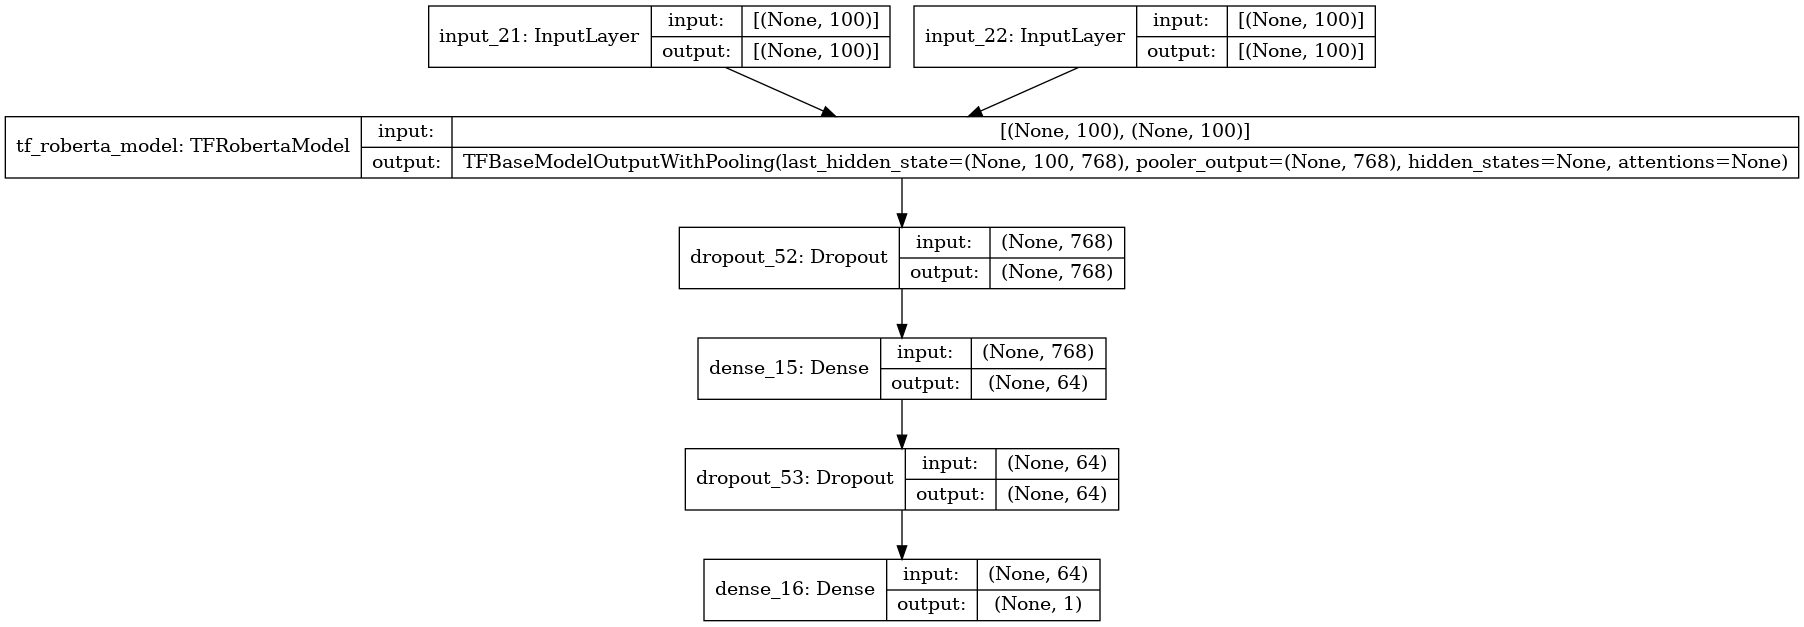

In [43]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Define your model as you did
def create_model(maxlen):
    dropout_rate = 0.2
    input_ids = tf.keras.layers.Input(shape=(maxlen,), dtype=tf.int32)
    input_mask = tf.keras.layers.Input(shape=(maxlen,), dtype=tf.int32)
    bert_layer = bert_model([input_ids, input_mask])[1]
    x = tf.keras.layers.Dropout(0.5)(bert_layer)
    x = tf.keras.layers.Dense(64, activation="tanh")(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.models.Model(inputs=[input_ids, input_mask], outputs=x)
    return model

# Create the model
maxlen = 100  # Replace with your desired maxlen
model = create_model(maxlen)

# Visualize the model and save it to a file
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [9]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model)

     |████████████████████████████████| 989 kB 4.0 MB/s eta 0:00:01


NameError: name 'model' is not defined

In [3]:
pip install tensorflow tensorboard-plugin-profile tensorboard-plugin-profile-3d

     |████████████████████████████████| 5.8 MB 3.8 MB/s eta 0:00:01
ERROR: Could not find a version that satisfies the requirement tensorboard-plugin-profile-3d (from versions: none)
ERROR: No matching distribution found for tensorboard-plugin-profile-3d
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade tensorflow

     |████████████████████████████████| 588.3 MB 4.8 kB/s  eta 0:00:01   |█                               | 20.2 MB 3.7 MB/s eta 0:02:35     |█████████                       | 166.0 MB 61.3 MB/s eta 0:00:07MB/s eta 0:00:04
     |████████████████████████████████| 22.9 MB 44.2 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 56.3 MB/s eta 0:00:01
     |████████████████████████████████| 439 kB 49.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 59.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 46.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 49.5 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 41.0 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.12.0
    Uninstalling absl-py-0.12.0:
      Successfully uninstall

In [7]:
import tensorflow as tf

def create_model(maxlen):
    dropout_rate = 0.2
    input_ids = tf.keras.layers.Input(shape=(maxlen,), dtype=tf.int32)
    input_mask = tf.keras.layers.Input(shape=(maxlen,), dtype=tf.int32)
    bert_layer = bert_model([input_ids, input_mask])[1]
    x = tf.keras.layers.Dropout(0.5)(bert_layer)
    x = tf.keras.layers.Dense(64, activation="tanh")(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.models.Model(inputs=[input_ids, input_mask], outputs=x)

    # Add a TensorBoard callback for visualization with profiling
    log_dir = "logs"  # Specify a directory for TensorBoard logs
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch='5,10')

    return model, tensorboard_callback

# Create the model and get the TensorBoard callback
maxlen = 100  # Replace with your desired maxlen
model, tb_callback = create_model(maxlen)


AssertionError: Duplicate registrations for type trackable_dict_wrapper

In [4]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorboard.plugins import profile
from tensorboard.plugins.profile import plugin_data_pb2

def create_model(maxlen):
    dropout_rate = 0.2
    input_ids = tf.keras.layers.Input(shape=(maxlen,), dtype=tf.int32)
    input_mask = tf.keras.layers.Input(shape=(maxlen,), dtype=tf.int32)
    bert_layer = bert_model([input_ids, input_mask])[1]
    x = tf.keras.layers.Dropout(0.5)(bert_layer)
    x = tf.keras.layers.Dense(64, activation="tanh")(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.models.Model(inputs=[input_ids, input_mask], outputs=x)

    # Add a TensorBoard callback for visualization
    log_dir = "logs"  # Specify a directory for TensorBoard logs
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch='5,10')

    return model, tensorboard_callback

# Create the model and get the TensorBoard callback
maxlen = 100  # Replace with your desired maxlen
model, tb_callback = create_model(maxlen)


ImportError: cannot import name 'profile' from 'tensorboard.plugins' (/opt/conda/lib/python3.7/site-packages/tensorboard/plugins/__init__.py)

In [46]:
tensorboard --logdir logs


SyntaxError: invalid syntax (323146663.py, line 1)

# Next

In [56]:
optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, decay=0.01,clipnorm=1.0)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

In [57]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

In [58]:
history = model.fit(x = {'input_7':X_train_token['input_ids'],'input_8':X_train_token['attention_mask']}, y = Y_train, epochs=10, validation_split = 0.2, batch_size = 30, callbacks=[callback])

Epoch 1/10
1527/1527 [==============================] - 1092s 702ms/step - loss: 0.1188 - accuracy: 0.9426 - val_loss: 0.0226 - val_accuracy: 0.9939
Epoch 2/10
1527/1527 [==============================] - 1069s 700ms/step - loss: 0.0141 - accuracy: 0.9966 - val_loss: 0.0174 - val_accuracy: 0.9956
Epoch 3/10
1527/1527 [==============================] - 1071s 701ms/step - loss: 0.0135 - accuracy: 0.9964 - val_loss: 0.0156 - val_accuracy: 0.9963
Epoch 4/10
1527/1527 [==============================] - 1070s 701ms/step - loss: 0.0104 - accuracy: 0.9976 - val_loss: 0.0143 - val_accuracy: 0.9962
Epoch 5/10
1527/1527 [==============================] - 1069s 700ms/step - loss: 0.0101 - accuracy: 0.9975 - val_loss: 0.0140 - val_accuracy: 0.9964
Epoch 6/10
1527/1527 [==============================] - 1070s 701ms/step - loss: 0.0088 - accuracy: 0.9980 - val_loss: 0.0146 - val_accuracy: 0.9964
Epoch 7/10
1527/1527 [==============================] - 1069s 700ms/step - loss: 0.0073 - accuracy: 0.9985

In [ ]:
3.08
3.28


In [ ]:
3.56
4.22


In [ ]:
5.02


In [ ]:
12.05

In [ ]:
12.38

In [ ]:
1.08

In [ ]:
1.37

In [ ]:
2.01


In [ ]:
2.27


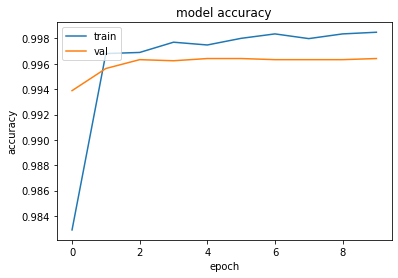

In [59]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

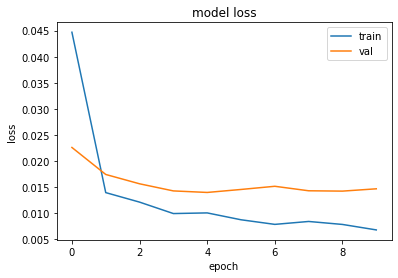

In [60]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


In [62]:
y_pred = np.where(model.predict({ 'input_7' : X_test_token['input_ids'] , 'input_8' : X_test_token['attention_mask']}) >=0.5,1,0)

Confusion matrix

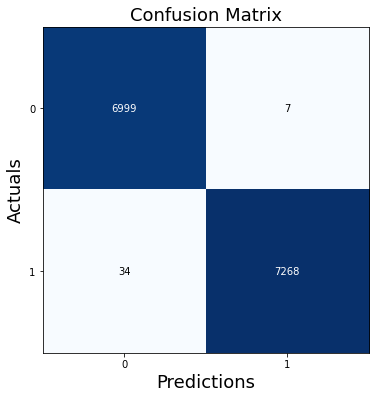

In [63]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [64]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7006
           1       1.00      1.00      1.00      7302

    accuracy                           1.00     14308
   macro avg       1.00      1.00      1.00     14308
weighted avg       1.00      1.00      1.00     14308



In [67]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, y_pred, digits=4)

# Print the report
print(report)


              precision    recall  f1-score   support

           0     0.9952    0.9990    0.9971      7006
           1     0.9990    0.9953    0.9972      7302

    accuracy                         0.9971     14308
   macro avg     0.9971    0.9972    0.9971     14308
weighted avg     0.9971    0.9971    0.9971     14308



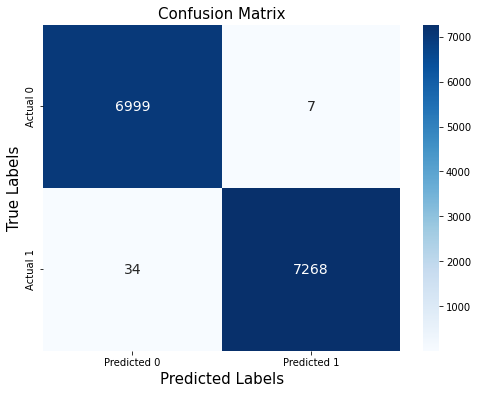

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix_values = confusion_matrix(Y_test,y_pred)

# # Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_values, annot=True, fmt='.0f', cmap='Blues',annot_kws={'size': 14},
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels', fontsize=15)
plt.ylabel('True Labels', fontsize=15)
plt.title('Confusion Matrix', fontsize=15)
plt.show()


In [66]:
from sklearn.metrics import accuracy_score

# Ground truth labels
true_labels = Y_test

# Predicted labels
predicted_labels = y_pred

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)


Accuracy: 0.9971344702264467


Custom data prediction

In [ ]:
test_text="Cop Shares Racist Meme About Michelle Obama; Now That Cop Is Having A VERY Bad Day (IMAGES)After the election of Donald Trump many folks seem to see it as a permission slip to be as racist and vile as possible. However, here s the thing, you re still going to get called out as racist and vile. And one Alabama police officer just found this out the hard way.According to the Washington Post: Talladega Police Officer Joel Husk was terminated Wednesday for violating the department s social media and code of conduct policies, City Manager Patrick Bryant said. What did he do? So glad you asked: Husk had posted several memes on his Facebook page, including one showing Obama and Melania Trump.  Fluent in Slovenian, English, French, Serbian, and German,  it said over Trump s photo. Over Obama s, it read:  Fluent in Ghetto. Not only that, he posted several extraordinarily racist memes:via Washington Postvia Washington PostAccording to the City Manager, the statements were  deemed to be biased or racially insensitive or derogatory  and because of that, they  have to take action to correct it. If you re going to be a police officer and serve all the public, you can t assume black people standing up for their rights are equivalent to the KKK. That s about the most horrific equivalence imaginable.Also, according to WaPo: Husk, 37, who had been with the department for about two and a half years, had also shared a meme showing President Obama with the words:  Was Dallas a terrorist attack? Yes! Carried out by Obama s own homegrown terrorist group! Which is a blatant lie and anyone who were to feel that way belongs nowhere near law enforcement. The city took the proper action letting this racist cop go, and hopefully it will be an example to police departments all over the country that this sort of behavior simply cannot be tolerated.Trump s election must not be allowed to serve as a permission slip to bigots everywhere that it s fine to be as awful as possible, because here in the land of the free and the home of the brave, everyone is protected. Everyone, regardless of color, class, gender, sexual orientation, or creed.Featured Photo by Chip Somodevilla/Getty Images'"

In [ ]:
test_token = tokenize(test_text)

In [ ]:
test_text_pred = np.where(model.predict({ 'input_1' : test_token['input_ids'] , 'input_2' : test_token['attention_mask']}) >=0.5,1,0)

In [ ]:
test_text_pred

In [ ]:
if(test_text_pred[0]==0):
    print("News is Fake")
else:
    print("News is Real")